In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [ ]:
file_path = r"C:\Users\Rama Al Jada\Desktop\MLmodel\Student_Performance.csv"
df = pd.read_csv(file_path)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
# Extracurricular Activities --> Encoding  Yes --> 1 No --> 0 
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
#  Scaling --> Standardization (Z-score) 
numeric_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

# crate scaler
scaler = StandardScaler()

# StandardScaler working on digital columns
df[numeric_features] = scaler.fit_transform(df[numeric_features])

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1,1.456205,-1.249754,91.0
1,-0.383481,0.723913,0,-1.492294,-0.900982,65.0
2,1.161410,-1.063626,1,0.276805,-0.900982,45.0
3,0.002742,-1.005963,1,-0.902594,-0.900982,36.0
4,0.775188,0.320275,0,0.866505,0.145333,66.0


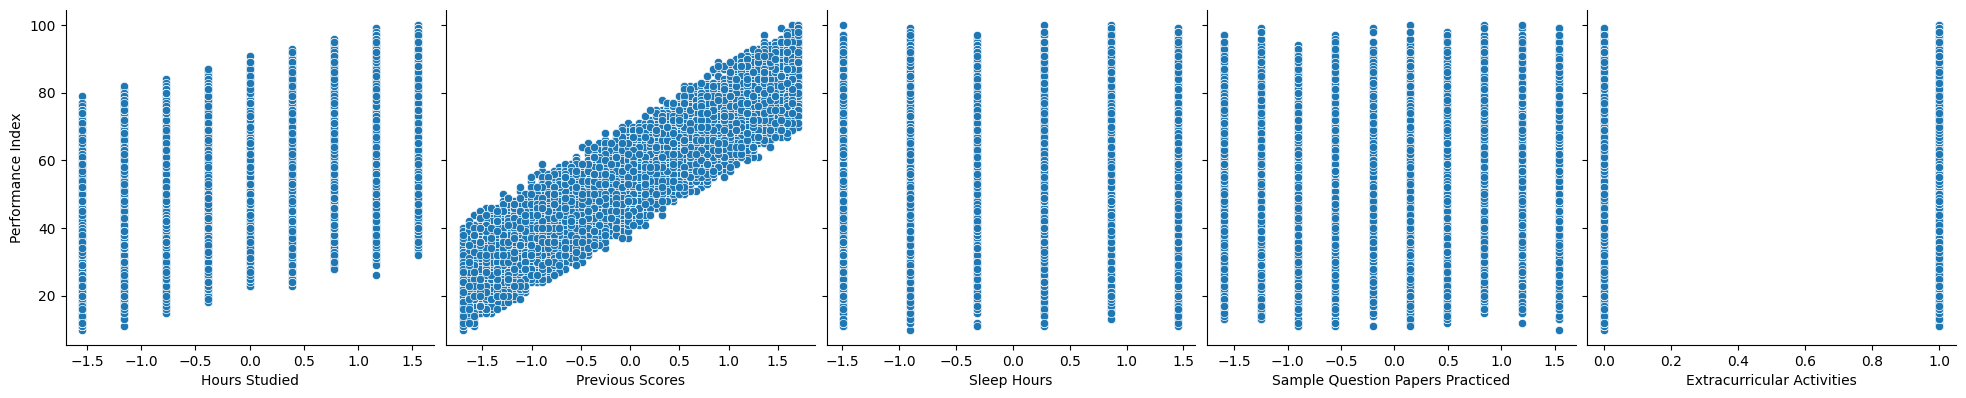

In [ ]:
# Pairplot Target with all featuers 
sns.pairplot(df, x_vars=['Hours Studied', 'Previous Scores', 'Sleep Hours', 
                         'Sample Question Papers Practiced', 'Extracurricular Activities'], 
             y_vars='Performance Index', height=4, aspect=1)
plt.show()


In [ ]:
# Split the Dataset 

X = df.drop('Performance Index', axis=1)  
y = df['Performance Index']     

# test 20% train  80%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (8000, 5) (8000,)
Test set: (2000, 5) (2000,)


In [ ]:
# Build Multi-Linear Regression

# create model 
model = LinearRegression()

# Training the model on the Training Set
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Predictions
# Predicting the marks for the Test Set
y_pred = model.predict(X_test)

#Actual  Student's actual grade
#Predicted  Grade predicted by the model
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head()

,Actual,Predicted
6252,51.0,54.711854
4684,20.0,22.615513
1731,46.0,47.903145
4742,28.0,31.289767
4521,41.0,43.004570


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1.611121346312304


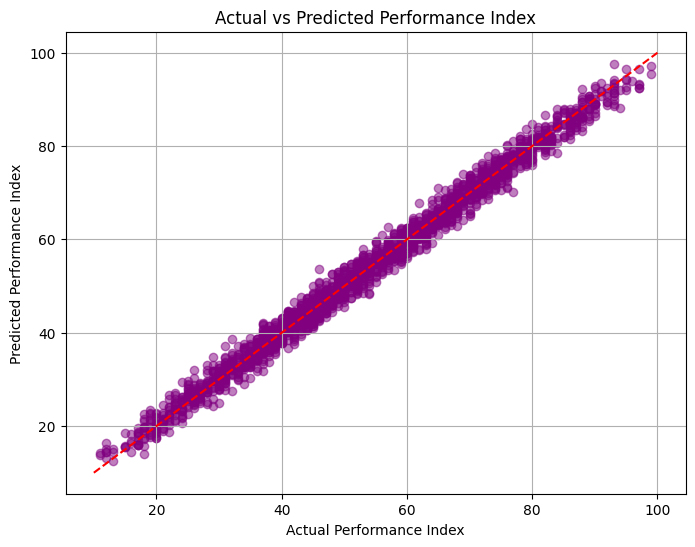

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([10, 100], [10, 100], color='red', linestyle='--')  
plt.title("Actual vs Predicted Performance Index")
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.grid(True)
plt.show()

In [ ]:
#Each point = one student
#Red 45° line = perfect prediction (Predicted = Actual)
#Closer points --> better model performance

In [ ]:
# Outliers
numeric_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

print("Checking Outliers using IQR method:\n")

for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {outliers.shape[0]} outliers")

Checking Outliers using IQR method:

Hours Studied: 0 outliers
Previous Scores: 0 outliers
Sleep Hours: 0 outliers
Sample Question Papers Practiced: 0 outliers
Performance Index: 0 outliers


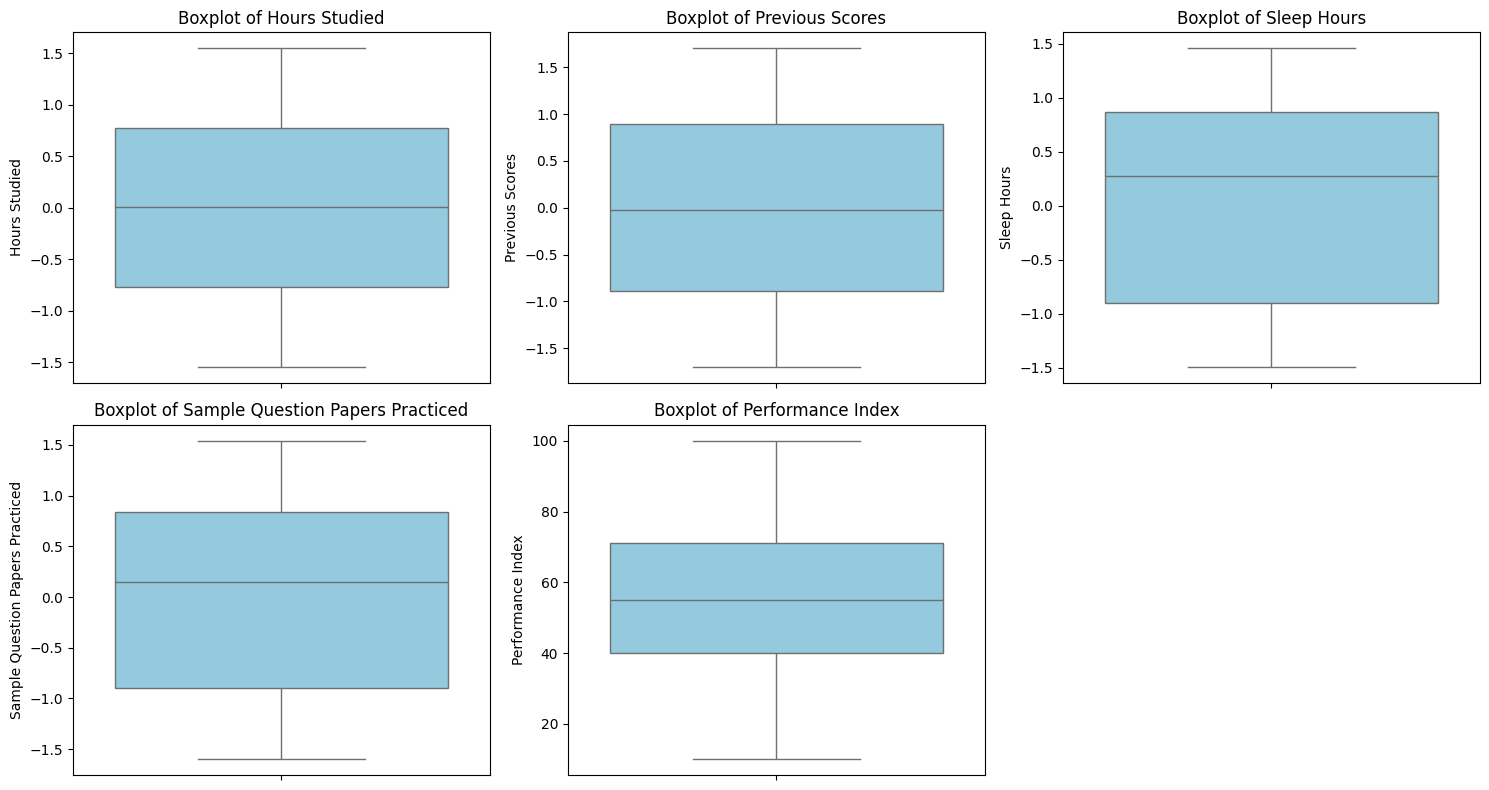

In [ ]:
numeric_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_features):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [ ]:
# Hyperparameter Tuning
# very simple Linear Regression --> it doesn’t have many hyperparameters like Random Forest or XGBoost

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error

# The base model
lr = LinearRegression()

# Criteria to test
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Using MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Grid Search
grid = GridSearchCV(estimator=lr, param_grid=param_grid, scoring=mae_scorer, cv=5)
grid.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid.best_params_)

# best model
best_model = grid.best_estimator_

# Predicting on the Test Set
y_pred_tuned = best_model.predict(X_test)

# MAE calculation
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
print("MAE after Hyperparameter Tuning:", mae_tuned)


Best Parameters: {'fit_intercept': True, 'positive': True}
MAE after Hyperparameter Tuning: 1.611121346312302


In [ ]:
# correlation matrix
corr_matrix = df.corr()

print(corr_matrix['Performance Index'].sort_values(ascending=False))

Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Extracurricular Activities          0.024525
Name: Performance Index, dtype: float64
